In [ ]:
Sys.setenv(HADOOP_CONF_DIR="/etc/hadoop/conf")
Sys.setenv(HADOOP_USER_NAME="hdfs")
Sys.setenv(SPARK_HOME="/opt/spark/latest")
library(SparkR, lib.loc = c(file.path(Sys.getenv("SPARK_HOME"), "R", "lib")))
sc <- sparkR.session(master = "local[*]")

In [ ]:
CountryDF <- sql("SELECT country,count(*) FROM parquet.`/guoda/data/idigbio-20161119-100k.parquet` GROUP BY country ")

In [3]:
showDF(CountryDF)

+--------------------+--------+
|             country|count(1)|
+--------------------+--------+
|               aruba|       3|
| virgin islands (uk)|       1|
|               liban|       1|
|              ceylon|       1|
|             finland|      59|
|               maroc|       5|
|saint helena, asc...|       2|
|           australia|     986|
|           greenland|      91|
|              greece|      23|
|             [japon]|       1|
|            portugal|      30|
|              borneo|       2|
|            amérique|       1|
|             ukraine|      19|
|            jamaique|       1|
|              israel|      30|
|[syrienne, republ...|       1|
|             nigeria|      29|
|netherlands antilles|       4|
+--------------------+--------+
only showing top 20 rows


In [5]:
write.df(CountryDF, "CountryDF.csv","csv")

In [3]:
library("ggplot2")

In [13]:
Countrydf_local <- collect(CountryDF)

In [14]:
Countrydf_local

country,count(1)
aruba,3
virgin islands (uk),1
liban,1
ceylon,1
finland,59
maroc,5
"saint helena, ascension and tristan da cunha",2
australia,986
greenland,91
greece,23


# Sorting R dataframe by Rank in ascending order

In [43]:
colnames(Countrydf_local) <- c("Country", "Count")
Countrydf_local_sorted <- Countrydf_local[order(-Countrydf_local$Count),]
#Countrydf_local

# Barplot for first 6 values from unsorted dataframe

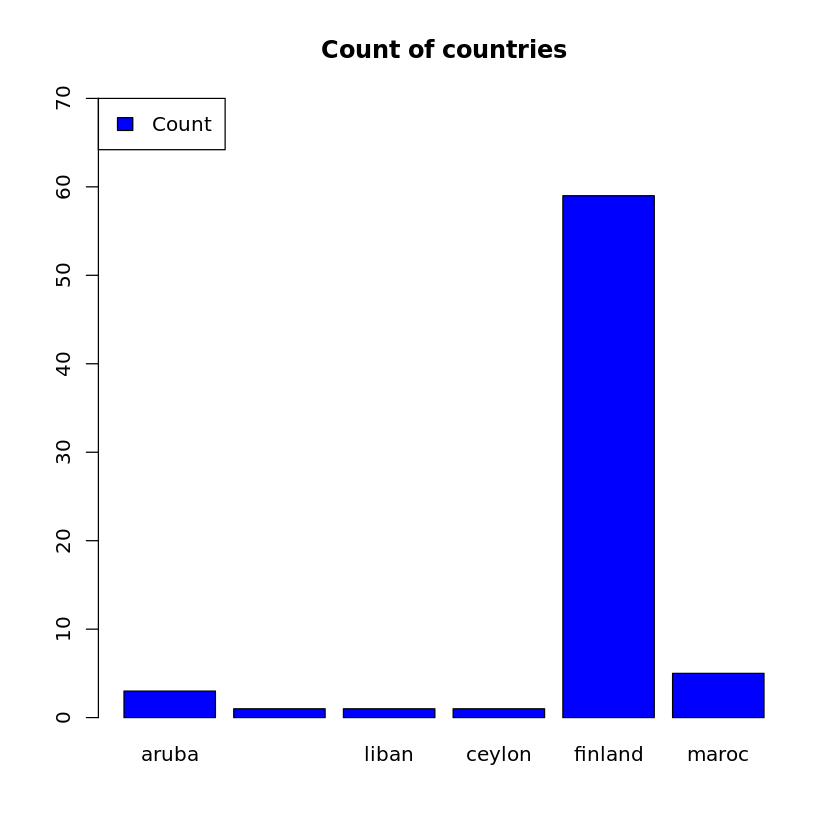

In [45]:
barplot(`colnames<-`(t(head(Countrydf_local)[-1]), head(Countrydf_local)[,1]),legend.text = TRUE, col = c("blue"), 
    args.legend = list(x = "topleft"),main='Count of countries',ylim=c(0,70))

# Barplot for first 6 values from sorted dataframe

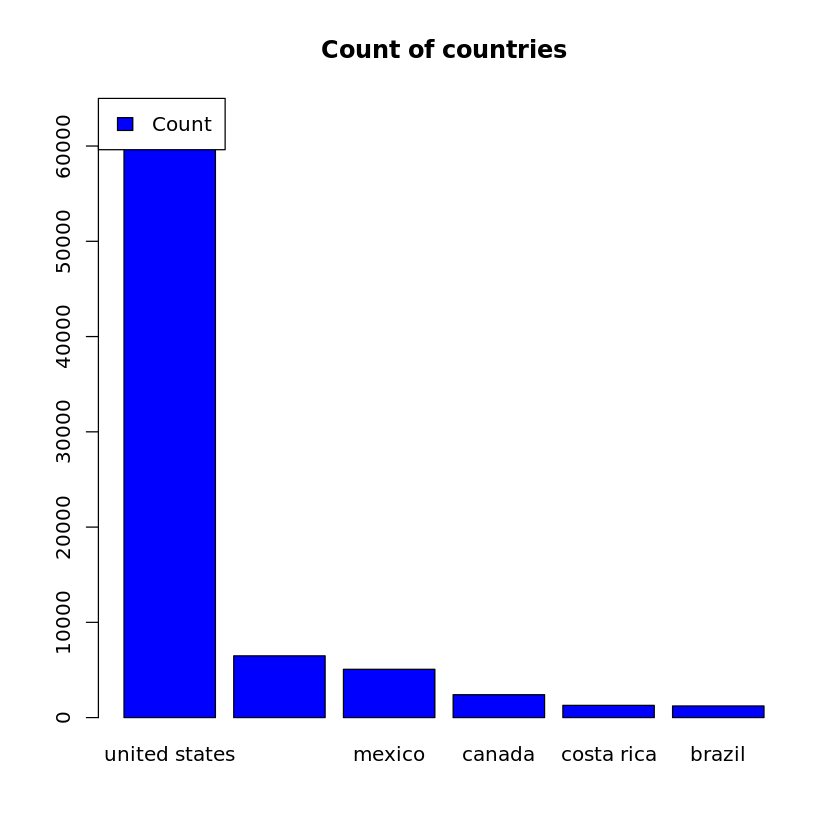

In [47]:
barplot(`colnames<-`(t(head(Countrydf_local_sorted)[-1]), head(Countrydf_local_sorted)[,1]),legend.text = TRUE, col = c("blue"), 
    args.legend = list(x = "topleft"),main='Count of countries',ylim=c(0,65000))

# Rank vs Count plot (Barplot for all values from unsorted dataframe)

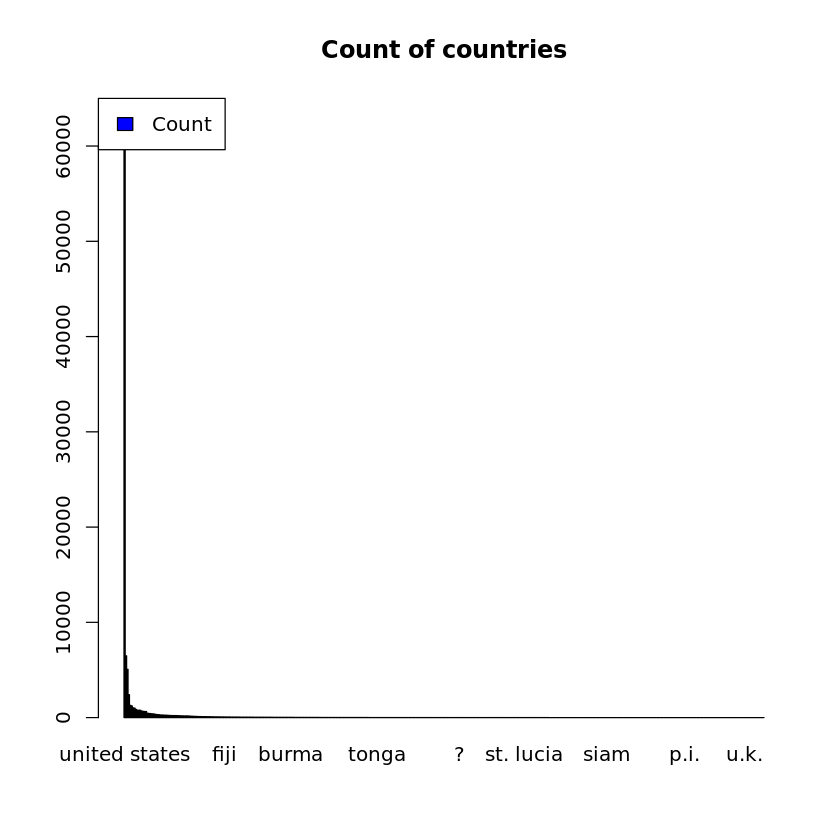

In [46]:
barplot(`colnames<-`(t(Countrydf_local_sorted[-1]), Countrydf_local_sorted[,1]),legend.text = TRUE, col = c("blue"), 
    args.legend = list(x = "topleft"),main='Count of countries',ylim=c(0,65000))